In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DF = pd.read_csv("data/final_data_rev/train/max_feature.csv")

In [3]:
DF.head()

,acc_id,label,guild,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,...,target_money,source_weapon,target_weapon,source_gem,target_gem,source_costume,target_costume,source_accessory,target_accessory,payment
0,b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...,week,-0.348442,3.0,1.519815,2.910685,0.000000,2.852241,2.332910,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,-0.348442,7.0,4.698532,9.147854,0.000000,8.584935,5.995250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...,week,-0.348442,3.0,1.110035,2.916233,0.000000,2.431554,1.261065,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,34095a3c9a2937ced3ea3fd75e22ce177dc5879d2a53f7...,week,-0.348442,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.428232
4,26f3db6e8817a93c4ceda9a16f0832945e43d950b95882...,week,-0.348442,3.0,0.000000,1.319653,0.025157,1.086231,1.515462,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


train score :  0.9401125
validation score :  0.87945


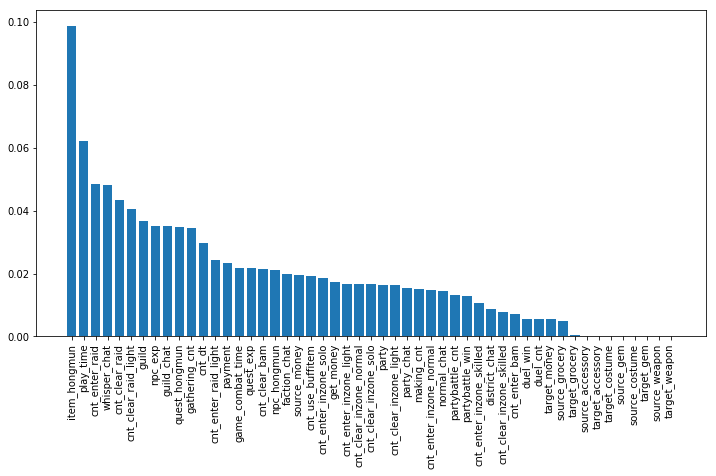

In [4]:
X = DF.drop(['acc_id', 'label'], axis = 1)
col_name = X.columns
X = X.values
y = DF['label'].replace({'week':0,'month':0,'2month':0,'retained':1}).values

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

print("train score : ", model.score(X_train,y_train))
print("validation score : ", model.score(X_val,y_val))

sort = pd.Series(model.feature_importances_)
sort = sort.sort_values(ascending = False)

plt.figure(figsize = (12,6))
plt.bar(col_name[sort.index], sort)
plt.xticks(rotation='vertical')
plt.show()

In [6]:
temp = pd.DataFrame(sort)
temp.index = col_name[sort.index]
temp = temp.reset_index()
temp.columns = ['feature', 'importance']
#temp.to_csv('feature_list.csv', index = False, encoding = False)

train score :  0.80555
validation score :  0.7072


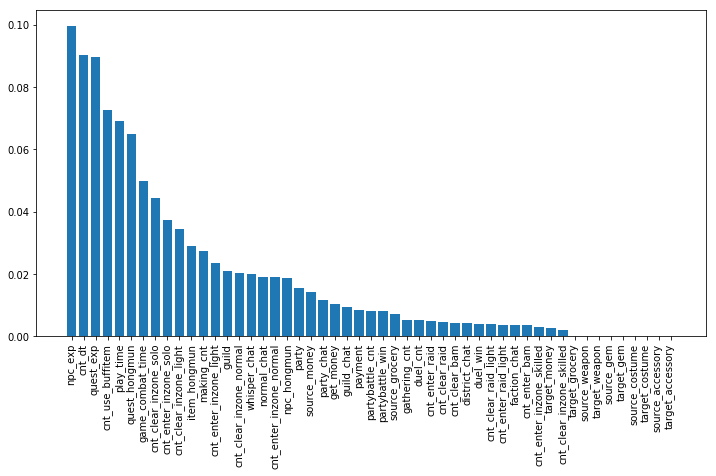

In [7]:
A = DF.drop(['acc_id', 'label'], axis = 1)
col_name = A.columns
A = A.values
A = A[:75000]
B = DF['label']
B = B[0:75000]

A_train, A_val, B_train, B_val = train_test_split(A,B,test_size=0.2,random_state=1)
model2 = RandomForestClassifier(n_estimators=100)
model2.fit(A_train,B_train)

print("train score : ", model2.score(A_train,B_train))
print("validation score : ", model2.score(A_val,B_val))

sort = pd.Series(model2.feature_importances_)
sort = sort.sort_values(ascending = False)

plt.figure(figsize = (12,6))
plt.bar(col_name[sort.index], sort)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
temp = pd.DataFrame(sort)
temp.index = col_name[sort.index]
temp = temp.reset_index()
temp.columns = ['feature', 'importance']
temp.to_csv('feature_list.csv', index = False, encoding = False)